In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pyart

In [7]:

# Read in the file, create a RadarMapDisplay object
filename = 'MDV-20150805-084449-PPIVol.nc'
radar = pyart.io.read(filename)
display = pyart.graph.RadarMapDisplay(radar)

In [8]:
# Setting projection and ploting the second tilt
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])

In [9]:
radar.longitude['data'][0],radar.latitude['data'][0]

(73.86896514892578, 18.04290008544922)

/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())


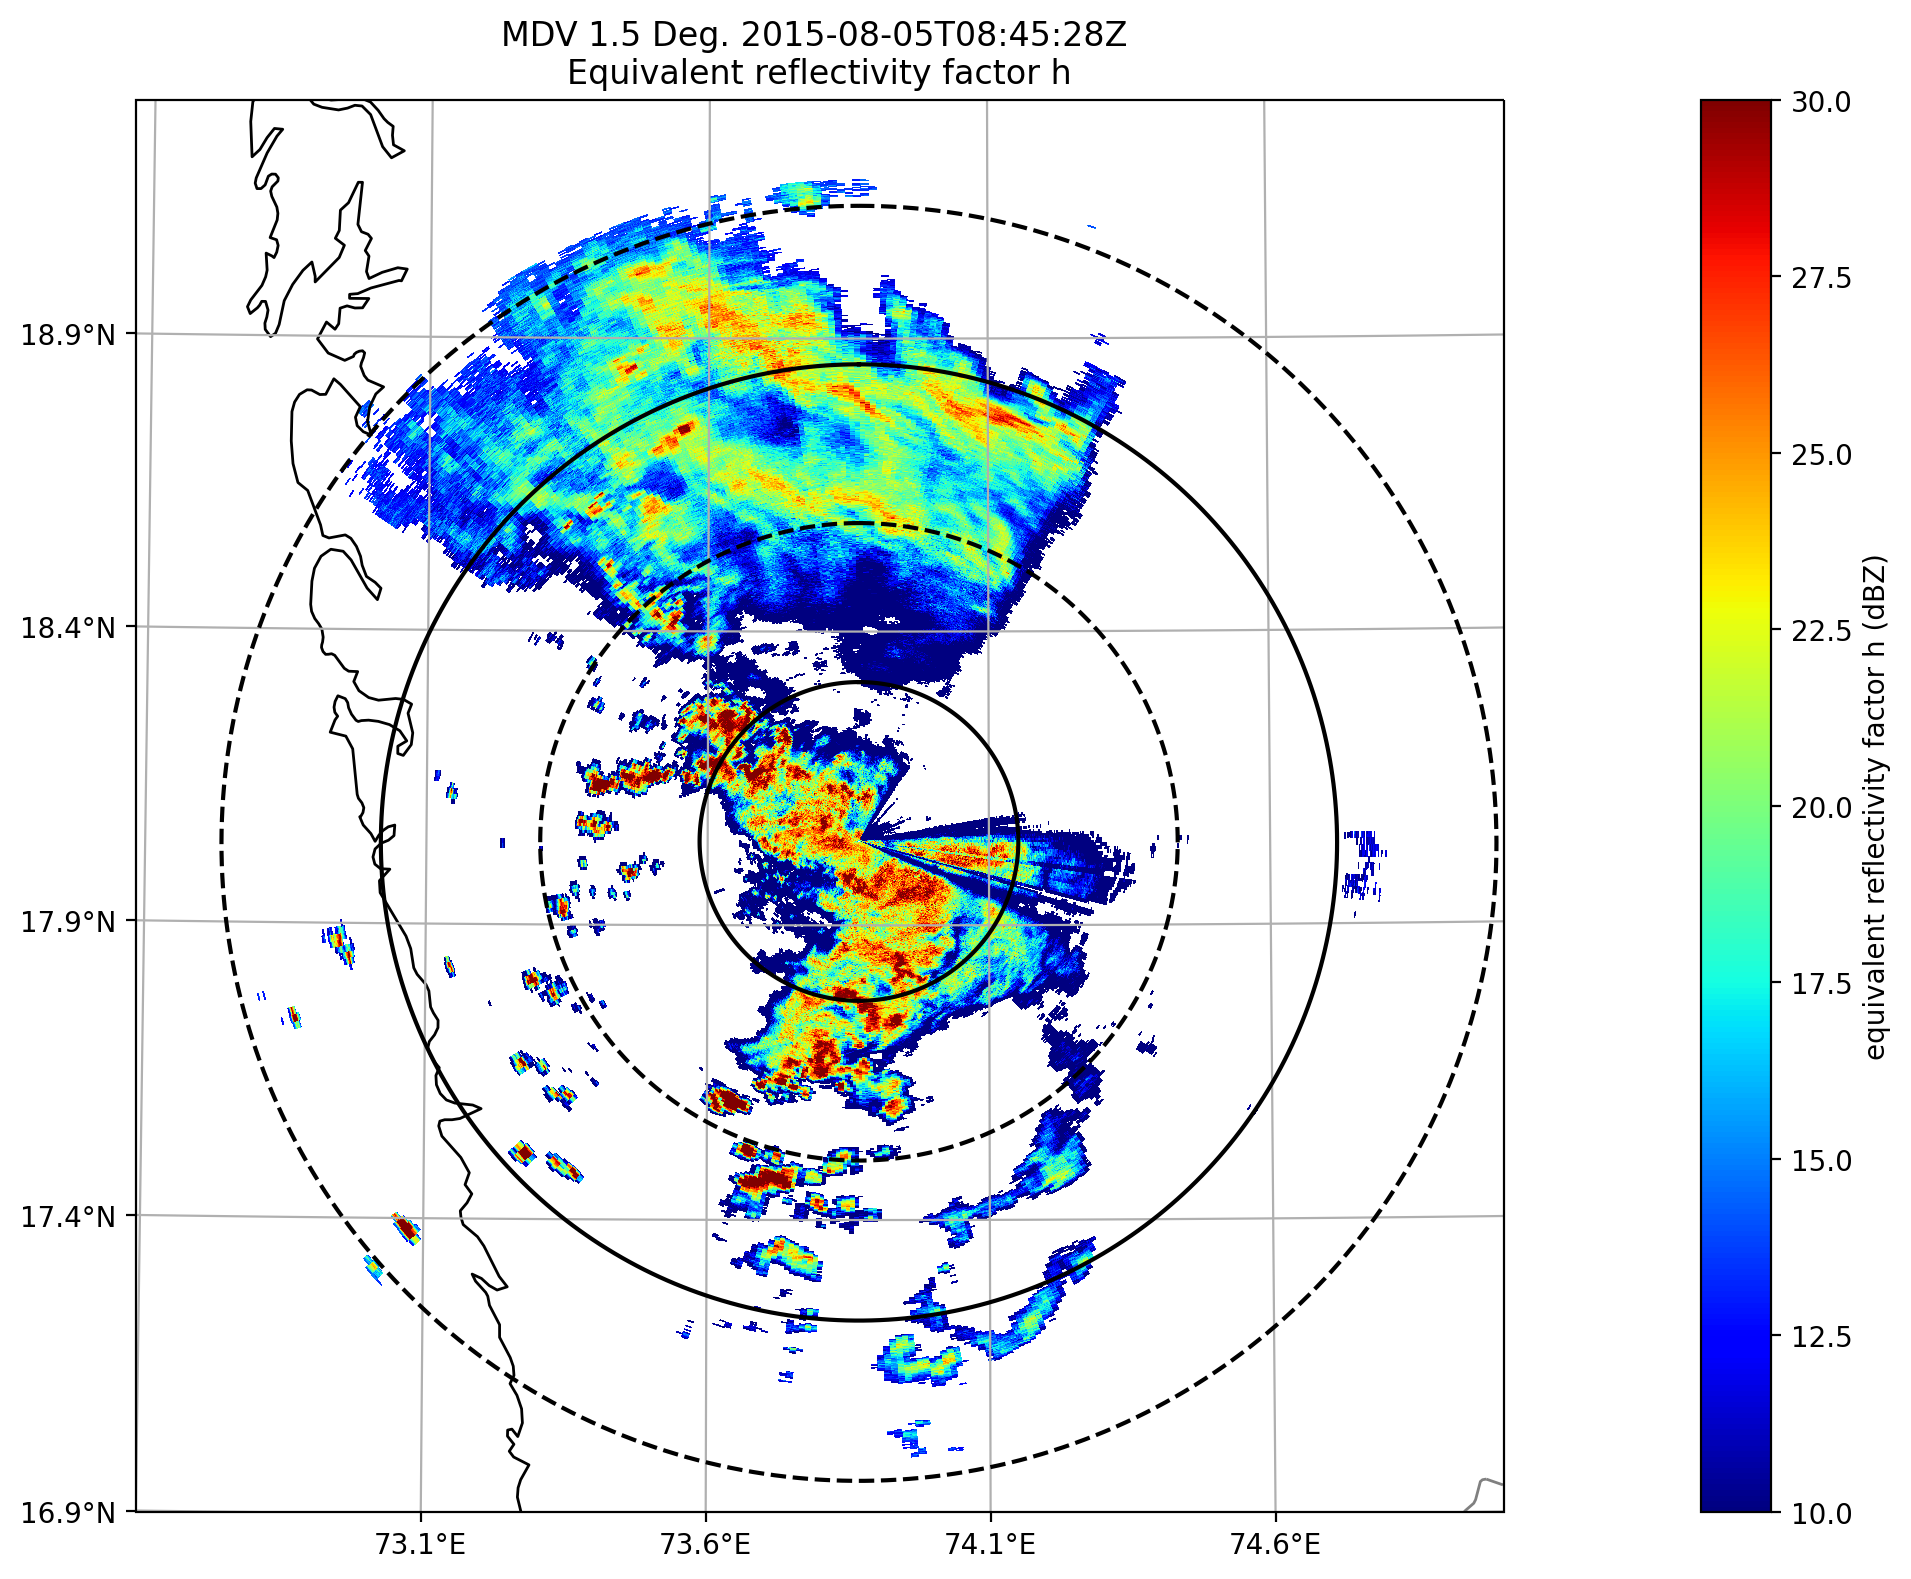

In [10]:
fig = plt.figure(figsize=[20,8],dpi=200)
display.plot_ppi_map('DBZH', 1, vmin=10, vmax=30,
                     min_lon=72.6, max_lon=75, min_lat=16.9, max_lat=19.3,
                     lon_lines=np.arange(72.6,75, .5), resolution='10m',
                     lat_lines=np.arange(16.9,19.3, .5), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0],cmap='jet')


# Plot range rings at 10, 20, 30, 40km
display.plot_range_ring(30., line_style='k-')
display.plot_range_ring(60., line_style='k--')
display.plot_range_ring(90., line_style='k-')
display.plot_range_ring(120., line_style='k--')
# Plot cross hairs
#display.plot_line_xy(np.array([-120000.0, 120000.0]), np.array([0.0, 0.0]),
                     #line_style='k-')
#display.plot_line_xy(np.array([0.0, 0.0]), np.array([-20000.0, 200000.0]),
                     #line_style='k-')

# Indicate the radar location with a point
# display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0])

fig.tight_layout()
plt.show()